<a href="https://colab.research.google.com/github/rynedaniels/project_2/blob/main/project_2_part_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Part 2/07: Classification Models/spanishwines.csv')

In [4]:
df.duplicated().sum()

5452

In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(2048, 11)

In [7]:
df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

In [8]:
df['type'].fillna('Missing', inplace=True)

In [9]:
median_body = df['body'].median()
median_acidity = df['acidity'].median()

df['body'].fillna(median_body, inplace=True)
df['acidity'].fillna(median_acidity, inplace=True)

In [10]:
df.isna().sum()

winery         0
wine           0
year           2
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

In [11]:
most_common_year = df['year'].mode()
df['year'].fillna(most_common_year, inplace=True)

In [12]:
for col in df.select_dtypes('object'):
  print(df[col].value_counts())

Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: winery, Length: 480, dtype: int64
Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Silvanus Edicion Limitada Ribera del Duero             1
El Jardin de las Iguales Vinedo

In [13]:
df.describe()

,rating,num_reviews,price,body,acidity
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,4.401123,573.994629,135.242194,4.224609,2.931641
std,0.147023,1376.153171,272.178316,0.614385,0.312912
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.300000,58.000000,31.917947,4.000000,3.000000
50%,4.400000,141.000000,53.625000,4.000000,3.000000
75%,4.500000,485.500000,110.000000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 6100
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       2048 non-null   object 
 1   wine         2048 non-null   object 
 2   year         2046 non-null   object 
 3   rating       2048 non-null   float64
 4   num_reviews  2048 non-null   int64  
 5   country      2048 non-null   object 
 6   region       2048 non-null   object 
 7   price        2048 non-null   float64
 8   type         2048 non-null   object 
 9   body         2048 non-null   float64
 10  acidity      2048 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 192.0+ KB


**Produced univariate visuals for the target and all features.**

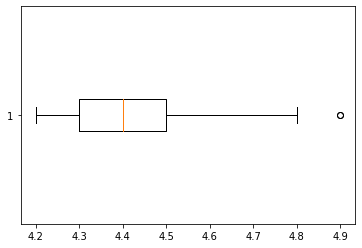

In [16]:
ratings_data = df['rating']
fig, ax = plt.subplots()
ax.boxplot([ratings_data], vert = False);

In [31]:
winery_group = df.groupby('winery')['rating'].mean()
sorted_wineries = winery_group.sort_values(ascending=False)
top_10_wineries = sorted_wineries.head(10)


top_10_wineries_df = top_10_wineries.reset_index()


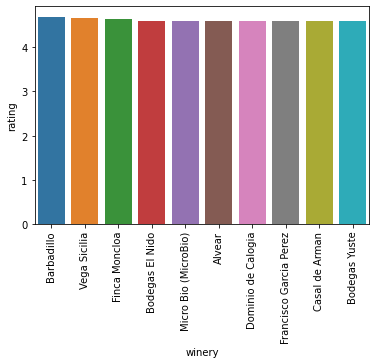

In [36]:
sns.barplot(data = top_10_wineries_df, x = 'winery', y='rating')
plt.xticks(rotation=90)
plt.show()

In [38]:
vino_group = df.groupby('wine')['rating'].mean()
sorted_vino = vino_group.sort_values(ascending=False)
top_10_vino = sorted_vino.head(10)

top_10_wineries_df = top_10_vino.reset_index()


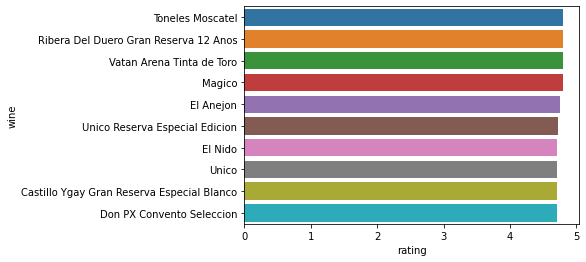

In [40]:
sns.barplot(data = top_10_wineries_df, x = 'rating', y='wine')
plt.show()

In [46]:
avg_vintage_rating = df.groupby('year')['rating'].mean()
avg_vintage_rating_df = avg_vintage_rating.reset_index()


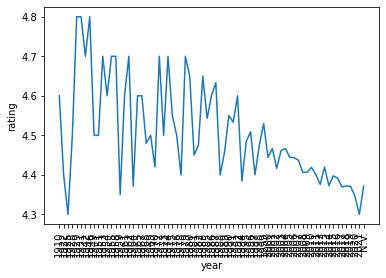

In [49]:
sns.lineplot(data = avg_vintage_rating_df, x='year', y='rating')
plt.xticks(rotation=90)
plt.show()

In [57]:
top_5_reviews = df.groupby('wine')['num_reviews'].sum()
sorted_reviews = top_5_reviews.sort_values(ascending=False)
sorted_reviews = sorted_reviews.head(5)
top_5_reviews_df = sorted_reviews.reset_index()

In [58]:
top_5_reviews_df

,wine,num_reviews
0,Ribera del Duero,62290
1,Valbuena 5o,61257
2,Tinto,45667
3,Toro,44832
4,Rioja Reserva,40031


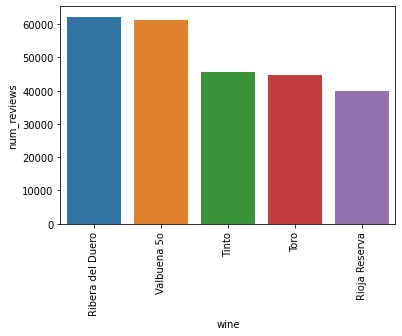

In [68]:
sns.barplot(data = top_5_reviews_df, x='wine', y='num_reviews')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='price'>

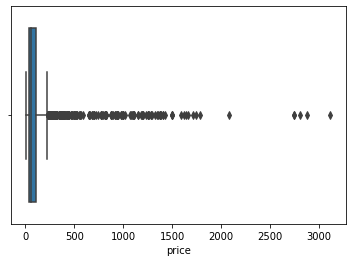

In [79]:
sns.boxplot(x=df['price'])


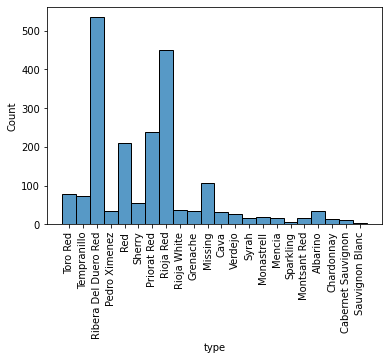

In [81]:
sns.histplot(x=df['type'])
plt.xticks(rotation=90)
plt.show()